In [239]:
import numpy as np
import matplotlib.pyplot as plt
import hiive.mdptoolbox
np.random.seed(0)
import hiive.mdptoolbox.example
from numpy import cumsum

#getting the transition and reward matrix
P, R = hiive.mdptoolbox.example.forest(S=5, r1=4, r2=2, p=0.1)
print(P,R)

#policy iteration
pi = hiive.mdptoolbox.mdp.PolicyIteration(P, R, 0.9)
pi.run()
pi.run_stats

[[[0.1 0.9 0.  0.  0. ]
  [0.1 0.  0.9 0.  0. ]
  [0.1 0.  0.  0.9 0. ]
  [0.1 0.  0.  0.  0.9]
  [0.1 0.  0.  0.  0.9]]

 [[1.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0. ]]] [[0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [4. 2.]]


[{'State': None,
  'Action': None,
  'Reward': 23.172433847048566,
  'Error': 14.1448095376563,
  'Time': 0.0,
  'V[0]': 4.475138121546962,
  'Max V': 23.172433847048566,
  'Mean V': 8.546088979354465,
  'Iteration': 1},
 {'State': None,
  'Action': None,
  'Reward': 23.172433847048566,
  'Error': 10.904809537656298,
  'Time': 0.0006701946258544922,
  'V[0]': 4.475138121546962,
  'Max V': 23.172433847048566,
  'Mean V': 11.375050886885726,
  'Iteration': 2},
 {'State': None,
  'Action': None,
  'Reward': 23.172433847048566,
  'Error': 8.2804095376563,
  'Time': 0.0009999275207519531,
  'V[0]': 4.475138121546962,
  'Max V': 23.172433847048566,
  'Mean V': 13.556012794416983,
  'Iteration': 3},
 {'State': None,
  'Action': None,
  'Reward': 29.208852400000016,
  'Error': 3.552713678800501e-15,
  'Time': 0.0009999275207519531,
  'V[0]': 17.218688400000016,
  'Max V': 29.208852400000016,
  'Mean V': 22.589939600000015,
  'Iteration': 4}]

In [240]:
pi.policy

(0, 0, 0, 0, 0)

In [241]:
pi.V

(17.218688400000016,
 19.344452400000016,
 21.968852400000017,
 25.208852400000016,
 29.208852400000016)

In [242]:
pi.iter

4

In [243]:
pi.time

0.0009999275207519531

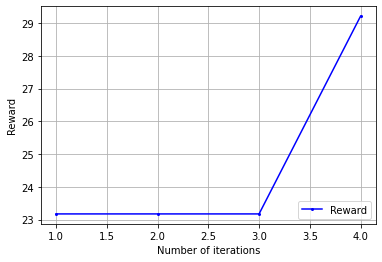

In [244]:
time_vector=[]
reward_vector=[]
iteration_vector=[]
for k in range (pi.iter):
    time_vector.append(pi.run_stats[k].get('Time'))
    reward_vector.append(pi.run_stats[k].get('Reward'))
    iteration_vector.append(pi.run_stats[k].get('Iteration'))

plt.plot(iteration_vector, reward_vector, marker='o', markersize=2,color='blue', label='Reward')
plt.xlabel('Number of iterations')
plt.ylabel('Reward')
plt.legend(loc='lower right')
plt.grid()
plt.show()

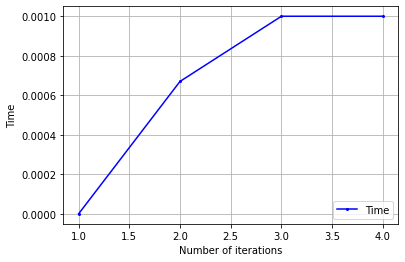

In [245]:
plt.plot(iteration_vector, time_vector, marker='o', markersize=2,color='blue', label='Time')
plt.xlabel('Number of iterations')
plt.ylabel('Time')
plt.legend(loc='lower right')
plt.grid()
plt.show()

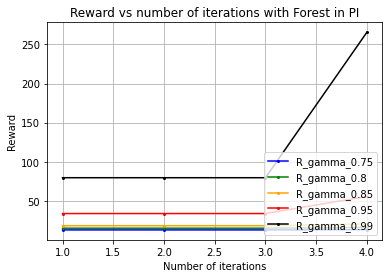

In [246]:
#evolution with a parameter gamma tuning: 
gamma_list=[0.75,0.80,0.85,0.95,0.99]
color_list=['blue','green','orange','red','black']
for g in range (0,len(gamma_list)):
    pi = hiive.mdptoolbox.mdp.PolicyIteration(P, R, gamma_list[g])
    pi.run()
    reward_vector=[]
    iteration_vector=[]
    for k in range (pi.iter):
        reward_vector.append(pi.run_stats[k].get('Reward'))
        iteration_vector.append(pi.run_stats[k].get('Iteration'))
    plt.plot(iteration_vector, reward_vector, marker='o', markersize=2,color=color_list[g], label='R_gamma_'+str(gamma_list[g]))
    plt.title('Reward vs number of iterations with Forest in PI')
    plt.xlabel('Number of iterations')
    plt.ylabel('Reward')
    plt.legend(loc='lower right')
    plt.grid()
plt.show()

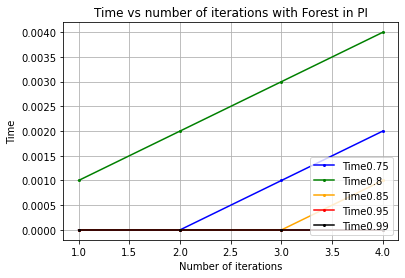

In [247]:
#evolution with a parameter gamma tuning: 
gamma_list=[0.75,0.80,0.85,0.95,0.99]
color_list=['blue','green','orange','red','black']
for g in range (0,len(gamma_list)):
    pi = hiive.mdptoolbox.mdp.PolicyIteration(P, R, gamma_list[g])
    pi.run()
    time_vector=[]
    iteration_vector=[]
    for k in range (pi.iter):
        time_vector.append(pi.run_stats[k].get('Time'))
        iteration_vector.append(pi.run_stats[k].get('Iteration'))
    plt.plot(iteration_vector, cumsum(time_vector), marker='o', markersize=2,color=color_list[g], label='Time'+str(gamma_list[g]))
    plt.xlabel('Number of iterations')
    plt.ylabel('Time')
    plt.title('Time vs number of iterations with Forest in PI')
    plt.legend(loc='lower right')
    plt.grid()
plt.show()

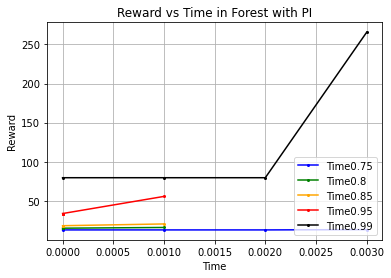

In [248]:
#evolution with a parameter gamma tuning: 
gamma_list=[0.75,0.80,0.85,0.95,0.99]
color_list=['blue','green','orange','red','black']
for g in range (0,len(gamma_list)):
    pi = hiive.mdptoolbox.mdp.PolicyIteration(P, R, gamma_list[g])
    pi.run()
    time_vector=[]
    reward_vector=[]
    for k in range (pi.iter):
        time_vector.append(pi.run_stats[k].get('Time'))
        reward_vector.append(pi.run_stats[k].get('Reward'))
    plt.plot(cumsum(time_vector), reward_vector, marker='o', markersize=2,color=color_list[g], label='Time'+str(gamma_list[g]))
    plt.title('Reward vs Time in Forest with PI')
    plt.xlabel('Time')
    plt.ylabel('Reward')
    plt.legend(loc='lower right')
    plt.grid()
plt.show()